# Dealing with Categorical Variables - Lab

## Introduction
In this lab, you'll explore the Boston Housing Data Set for categorical variables, and you'll transform your data so you'll be able to use categorical data as predictors!

## Objectives
You will be able to:
* Identify and inspect the categorical variables in the Boston housing data set
* Learn how to categorize inputs that aren't categorical
* Create new datasets with dummy variables 

## Importing the Boston Housing data set

Let's start by importing the Boston Housing data set. This data set is available in Scikit-Learn, and can be imported running the column below.

In [121]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

If you'll inspect Boston now, you'll see that this basically returns a dictionary. Let's have a look at what exactly is stored in the dictionary by looking at the dictionary keys 

In [122]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [123]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [124]:
print(boston.data.shape)

(506, 13)


In [125]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [126]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's create a Pandas DataFrame with the data (which are the features, not including the target) and the feature names as column names.

In [127]:
boston_features = pd.DataFrame(boston.data)
boston_features.columns = boston.feature_names
boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


For your reference, we copied the attribute information below. Additional information can be found here: http://scikit-learn.org/stable/datasets/index.html#boston-dataset
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population

Let's convert the target to a dataframe as well, and assign the column name "MEDV"

In [128]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [129]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [130]:
boston_target = pd.DataFrame(boston.target)
boston_target.columns = ["MEDV"]
boston_target.head()


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


The target is described as: 
- MEDV: Median value of owner-occupied homes in $1000’s

Next, let's merge the target and the predictors in one dataframe `boston_df`.

THIS IS TOO COMPLICATED, SO I'M JUST ADDING ANOTHER COLUMN.

In [131]:
boston_features["MEDV"] = boston.target
boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [132]:
boston_df = boston_features

Let's inspect these 13 features using `.describe()` and `.info()`

In [133]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [134]:

boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


Now, take a look at the scatter plots for each predictor with the target on the y-axis.

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# create scatter plots

In [136]:

from sklearn.linear_model import LinearRegression

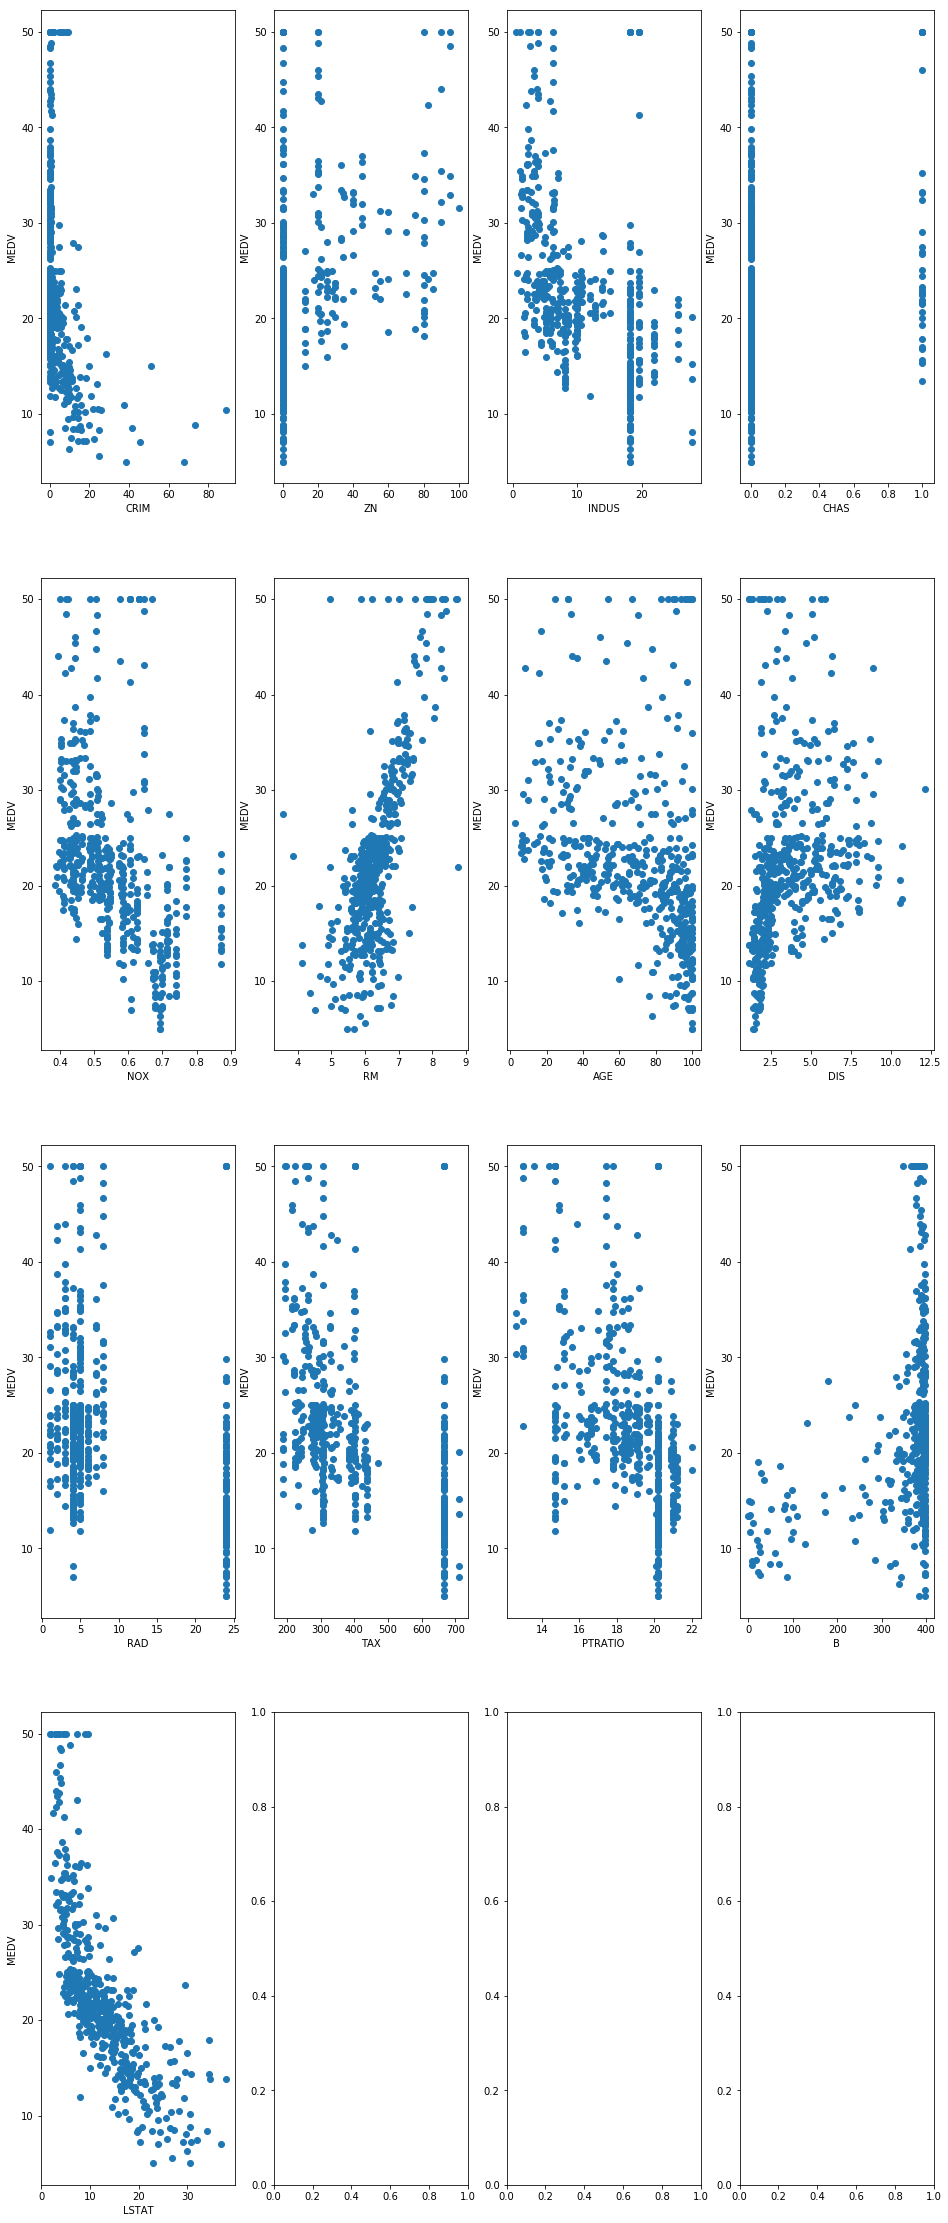

In [137]:

fig,axes = plt.subplots(4,4, figsize = (16, 40))
for i, axe in enumerate(axes.flatten()):
#     if 0 > i > len(boston_df.columns):
    if i > 12:
        break
    else:
        col = boston_df.columns[i]
        axe.scatter(boston_df[col], boston_df["MEDV"])
        axe.set_xlabel(col)
        axe.set_ylabel("MEDV")
    
# axe = axes.flatten()[0]


## To categorical: binning

If you created your scatterplots correctly, you'll notice that except for CHAS (the Charles River Dummy variable), there is no clearly categorical data. You will have seen though that RAD and TAX have more of a vertical-looking structure like the one seen in the lesson, and that there is less of a "cloud"-looking structure compared to most other variables. It is difficult to justify a linear pattern between predictor and target here. In this situation, it might make sense to restructure data into bins so that they're treated as categorical variables. We'll start by showing how this can be done for RAD and then it's your turn to do this for TAX.

### "RAD"

Look at the structure of "RAD" to decide how to create your bins. 

In [138]:
boston_df["RAD"].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

In [191]:
boston_df["RAD"].unique()

array([0, 2, 1, 3])

In [139]:
# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
# use pd.cut
bins_rad = pd.cut(boston_df['RAD'], bins)

In [140]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_rad = bins_rad.cat.as_unordered()
bins_rad.head()

0    (0, 3]
1    (0, 3]
2    (0, 3]
3    (0, 3]
4    (0, 3]
Name: RAD, dtype: category
Categories (4, interval[int64]): [(0, 3], (3, 4], (4, 5], (5, 24]]

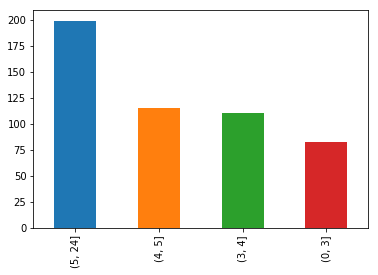

In [141]:
# inspect the result
bins_rad.value_counts().plot(kind='bar')

In [142]:
# replace the existing "RAD" column
boston_df["RAD"]=bins_rad

### "TAX"

Split the "TAX" column up in 5 categories. You can chose the bins as desired but make sure they're pretty well-balanced.

In [143]:
boston_df["TAX"].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

In [144]:
boston_df["TAX"].unique()

array([296., 242., 222., 311., 307., 279., 252., 233., 243., 469., 226.,
       313., 256., 284., 216., 337., 345., 305., 398., 281., 247., 270.,
       276., 384., 432., 188., 437., 403., 193., 265., 255., 329., 402.,
       348., 224., 277., 300., 330., 315., 244., 264., 223., 254., 198.,
       285., 241., 293., 245., 289., 358., 304., 287., 430., 422., 370.,
       352., 351., 280., 335., 411., 187., 334., 666., 711., 391., 273.])

In [158]:
tbins = [150, 250, 350, 450, 550, 650]
bins_tax = pd.cut(boston_df['TAX'], tbins)

In [159]:
bins_tax = bins_tax.cat.as_unordered()
bins_tax.head()

0    (250, 350]
1    (150, 250]
2    (150, 250]
3    (150, 250]
4    (150, 250]
Name: TAX, dtype: category
Categories (5, interval[int64]): [(150, 250], (250, 350], (350, 450], (450, 550], (550, 650]]

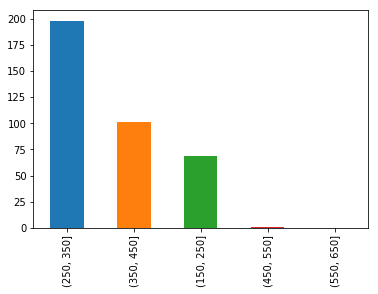

In [160]:
bins_tax.value_counts().plot(kind = "bar")

## Perform label encoding 

NOTE to Tara: 
tbins = [150, 250, 350, 450, 550, 650]
bins_tax = pd.cut(boston_df['TAX'], tbins)
bins_tax = bins_tax.cat.as_unordered()

passing tbins as an argument into label_encoder() gave me a new column with as many possible values as the bin number.
passing tbins as an argument into one-hot encoding style creates vectors with as many dimensions as the bin number, of which one and only one has a value, 1.

In [163]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb_make = LabelEncoder()
gen_ohe = OneHotEncoder()

In [167]:
rad_lab = lb_make.fit_transform(boston_df["RAD"])


In [171]:
rad_lab

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2, 3, 3, 3, 3, 3, 3, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,

In [172]:
boston_df["Radial Values"] = rad_lab

In [177]:
boston_df.iloc[5:11]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Radial Values
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,0,222.0,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,2,311.0,15.2,395.60,12.43,22.9,2
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,2,311.0,15.2,396.90,19.15,27.1,2
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,2,311.0,15.2,386.63,29.93,16.5,2
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,2,311.0,15.2,386.71,17.10,18.9,2
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,2,311.0,15.2,392.52,20.45,15.0,2


In [178]:
tax_bracks = lb_make.fit_transform(boston_df["TAX"])

In [183]:
bins_tax

0      (250, 350]
1      (150, 250]
2      (150, 250]
3      (150, 250]
4      (150, 250]
5      (150, 250]
6      (250, 350]
7      (250, 350]
8      (250, 350]
9      (250, 350]
10     (250, 350]
11     (250, 350]
12     (250, 350]
13     (250, 350]
14     (250, 350]
15     (250, 350]
16     (250, 350]
17     (250, 350]
18     (250, 350]
19     (250, 350]
20     (250, 350]
21     (250, 350]
22     (250, 350]
23     (250, 350]
24     (250, 350]
25     (250, 350]
26     (250, 350]
27     (250, 350]
28     (250, 350]
29     (250, 350]
          ...    
476           NaN
477           NaN
478           NaN
479           NaN
480           NaN
481           NaN
482           NaN
483           NaN
484           NaN
485           NaN
486           NaN
487           NaN
488           NaN
489           NaN
490           NaN
491           NaN
492           NaN
493    (350, 450]
494    (350, 450]
495    (350, 450]
496    (350, 450]
497    (350, 450]
498    (350, 450]
499    (350, 450]
500    (35

In [184]:
boston_df["Tax Bracket"] = bins_tax
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Radial Values,Tax Bracket
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0,296.0,15.3,396.90,4.98,24.0,0,"(250, 350]"
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,0,242.0,17.8,396.90,9.14,21.6,0,"(150, 250]"
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,0,242.0,17.8,392.83,4.03,34.7,0,"(150, 250]"
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,0,222.0,18.7,394.63,2.94,33.4,0,"(150, 250]"
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,0,222.0,18.7,396.90,5.33,36.2,0,"(150, 250]"


In [186]:
boston_rt = boston_df.drop(["RAD", "TAX"], axis = 1)
boston_rt.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV,Radial Values,Tax Bracket
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0,0,"(250, 350]"
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6,0,"(150, 250]"
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7,0,"(150, 250]"
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4,0,"(150, 250]"
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2,0,"(150, 250]"


## Create dummy variables

Create dummy variables, and make sure their column names contain "TAX" and "RAD". Add the new dummy variables to boston_df and remove the old "RAD" and "TAX" columns.

In [192]:
tax_bi = pd.get_dummies(bins_tax, prefix = "Tax bracket")

In [193]:
rad_bi = pd.get_dummies(rad_lab, prefix = "Radial Index")

In [194]:
tax_rad_bi = boston_df.drop(["RAD", "TAX"], axis = 1)


In [195]:
tax_rad_bi = pd.concat([tax_rad_bi, tax_bi, rad_bi], axis = 1)

In [196]:
tax_rad_bi.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,...,Tax Bracket,"Tax bracket_(150, 250]","Tax bracket_(250, 350]","Tax bracket_(350, 450]","Tax bracket_(450, 550]","Tax bracket_(550, 650]",Radial Index_0,Radial Index_1,Radial Index_2,Radial Index_3
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,...,"(250, 350]",0,1,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,...,"(150, 250]",1,0,0,0,0,1,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,...,"(150, 250]",1,0,0,0,0,1,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,...,"(150, 250]",1,0,0,0,0,1,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,...,"(150, 250]",1,0,0,0,0,1,0,0,0


In [197]:
tax_rad_bi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 23 columns):
CRIM                      506 non-null float64
ZN                        506 non-null float64
INDUS                     506 non-null float64
CHAS                      506 non-null float64
NOX                       506 non-null float64
RM                        506 non-null float64
AGE                       506 non-null float64
DIS                       506 non-null float64
PTRATIO                   506 non-null float64
B                         506 non-null float64
LSTAT                     506 non-null float64
MEDV                      506 non-null float64
Radial Values             506 non-null int64
Tax Bracket               369 non-null category
Tax bracket_(150, 250]    506 non-null uint8
Tax bracket_(250, 350]    506 non-null uint8
Tax bracket_(350, 450]    506 non-null uint8
Tax bracket_(450, 550]    506 non-null uint8
Tax bracket_(550, 650]    506 non-null uint8
Radial Index_

Note how you end up with 21 columns now!

## Summary

In this lab, you practiced your categorical variable knowledge on the Boston Housing Data Set!